<a href="https://colab.research.google.com/github/jinay780/python/blob/master/spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
email_data=pd.read_csv('emails.csv')
email_data.head(5)

In [4]:
email_data.shape

(5172, 3002)

In [5]:
email_data.isnull().sum()

Email No.     0
the           0
to            0
ect           0
and           0
             ..
military      0
allowing      0
ff            0
dry           0
Prediction    0
Length: 3002, dtype: int64

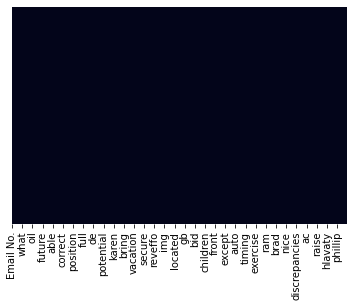

In [6]:
sns.heatmap(email_data.isnull(),yticklabels=False,cbar=False)

In [18]:
X=email_data.iloc[:,[2,3]].values
Y=email_data.iloc[:,4].values

In [19]:
X

array([[ 0,  1],
       [13, 24],
       [ 0,  1],
       ...,
       [ 0,  1],
       [ 7,  1],
       [24,  5]])

In [20]:
Y

array([0, 6, 0, ..., 1, 0, 1])

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [26]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [30]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [32]:
y_pred=model.predict(X_test)
y_pred

array([27, 27, 20, ..., 26, 27, 26])

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[  0, 221,   0, ...,   0,   0,   0],
       [  0,  36,   0, ...,   0,   0,   0],
       [  0,  19,   0, ...,   0,   0,   1],
       ...,
       [  0,   0,   0, ...,   0,   0,   1],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [36]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,y_pred)

0.024484536082474227